#  DATA ANALYTICS AND PREDICTION OF NSW HOUSE PRICE

**Project Owner: Brian Ong**
Sydney, 7th May 2023

I.	Introduction

1.	Overview of the Project:
The real estate industry remains one of the most attractive sectors for both investors and homebuyers, as owning property—whether as an investment or a family home—is a widely shared aspiration. Domain, one of the leading companies in the real estate market, has experienced significant growth, particularly with property prices climbing dramatically in recent years. Real estate encompasses various property types, including houses, apartments, and vacant land, and its trends often reflect the broader economic conditions of a country. Understanding these shifts is key, and my house price prediction project, focusing on Domain's data, aims to shed light on these developments and forecast future market behavior.

2.	Objectives of the Project and Define the problem
* What is the trend and future of real estate market;
* What kind of real estate dominate the whole industries;
* What is the average price of properties by segment through years (2016-2021);
* Which suburb is the most attractive with homebuyer and investor based on price per square;
* How the suburb factor impact on housing price (distance from CBD, median income, population and elevation);
* How the property factor impact on housing price (number of bedroom, bathroom, carpark);
* Which areas have the highest concentration of sold properties;
* Is linear regression the most suitable model for predicting house sales, or is there another model that demonstrates greater predictive accuracy;


II.	Data Collection and Preprocessing
1.	Data Source:

    First Dataset: 
www.kaggle.com/datasets/alexlau203/sydney-house-prices
    
    Second Dataset: 
www.kaggle.com/datasets/karltse/sydney-suburbs-reviews

2.	Data Loading:

In [86]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import datetime as dt
import statistics
import missingno as msno
import seaborn as sns 
import plotly.graph_objects as go # map
import plotly.express as px 
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.axes as axes
from matplotlib.ticker import ScalarFormatter
from matplotlib.gridspec import GridSpec # multiple plots
from matplotlib.colors import LinearSegmentedColormap
colors_palette={'#312783', '#0069B4','#24AFE7','#0085AC','#006C6F','#006A32','#799E1A','#94C11F','#D3D800','#FFED00'}

In [87]:
# LOADING DATA
dataset1 = pd.read_csv(r'C:\Users\UOW\Downloads\House_Price_analyse\domain_properties.csv')

domain_df=dataset1.copy()

#Display all columns of dataset
pd.set_option('display.max_columns', None)
domain_df.head(3)

,price,date_sold,suburb,num_bath,num_bed,num_parking,property_size,type,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd
0,530000,13/1/16,Kincumber,4,4,2,1351,House,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05
1,525000,13/1/16,Halekulani,2,4,2,594,House,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54
2,480000,13/1/16,Chittaway Bay,2,4,2,468,House,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59


3.	Data Cleaning and data type modifying

In [88]:
# CHECK DUPLICATE AND NULL DATA
domain_df.drop_duplicates()

#Replace all +/-infinite data by null value to double check invalid data
domain_df.replace([np.inf, -np.inf], np.nan, inplace=True)
domain_df.isna().sum()

price                       0
date_sold                   0
suburb                      0
num_bath                    0
num_bed                     0
num_parking                 0
property_size               0
type                        0
suburb_population           0
suburb_median_income        0
suburb_sqkm                 0
suburb_lat                  0
suburb_lng                  0
suburb_elevation            0
cash_rate                   0
property_inflation_index    0
km_from_cbd                 0
dtype: int64

In [89]:
#EXPLORING FEATURE
domain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     11160 non-null  int64  
 1   date_sold                 11160 non-null  object 
 2   suburb                    11160 non-null  object 
 3   num_bath                  11160 non-null  int64  
 4   num_bed                   11160 non-null  int64  
 5   num_parking               11160 non-null  int64  
 6   property_size             11160 non-null  int64  
 7   type                      11160 non-null  object 
 8   suburb_population         11160 non-null  int64  
 9   suburb_median_income      11160 non-null  int64  
 10  suburb_sqkm               11160 non-null  float64
 11  suburb_lat                11160 non-null  float64
 12  suburb_lng                11160 non-null  float64
 13  suburb_elevation          11160 non-null  int64  
 14  cash_r

Data Explaination
1. **Price**: Price of the house. Data type: `int64`.

2. **Date Sold**: Date when the house was sold. Data type: `object`.

3. **Suburb**: Suburb where the house is located. Data type: `object`.

4. **Number of Bathrooms**: Number of bathrooms in the house. Data type: `int64`.

5. **Number of Bedrooms**: Number of bedrooms in the house. Data type: `int64`.

6. **Number of Parking Spaces**: Number of parking spaces associated with the house. Data type: `int64`.

7. **Property Size**: Size of the property in square meters. Data type: `int64`.

8. **Type**: Type of the property (e.g., house, apartment). Data type: `object`.

9. **Suburb Population**: Population of the suburb where the house is located. Data type: `int64`.

10. **Suburb Median Income**: Median income of residents in the suburb. Data type: `int64`.

11. **Suburb Area (Square Kilometers)**: Area of the suburb in square kilometers. Data type: `float64`.

12. **Suburb Latitude**: Latitude coordinate of the suburb. Data type: `float64`.

13. **Suburb Longitude**: Longitude coordinate of the suburb. Data type: `float64`.

14. **Suburb Elevation**: Elevation of the suburb. Data type: `int64`.

15. **Cash Rate**: Cash rate, representing the interest rate set by the Reserve Bank of Australia. Data type: `float64`.

16. **Property Inflation Index**: Index representing inflation in property prices. Data type: `float64`.

17. **Distance from CBD (Kilometers)**: Distance from the Central Business District (CBD) in kilometers. Data type: `float64`.


In [90]:
# DATA CONVERTION AND FEATURE ANALYSIS

#convert string datatype of date_sold to datetime
domain_df['date_sold']=pd.to_datetime(domain_df['date_sold'])

#Add price per square to have a better objective view of housing price
domain_df['price_per_square']=round((domain_df['price']/domain_df['property_size']),1)

#Add suburb population per km2 reveal ratio of population and size of suburb
domain_df['suburb_population_per_km2']=round((domain_df['suburb_population']/(domain_df['suburb_sqkm'])),1)

#Add year, month columns
domain_df['year_sold']=domain_df['date_sold'].dt.year
domain_df['month_sold']=domain_df['date_sold'].dt.month
domain_df['month_name_sold']=domain_df['date_sold'].dt.month_name().str[:3]

#Create quarterize function to add quarter column in dataset
def quaterize(month,year):
    match month:
        case 1|2|3:
            return f'{year}-Q1'
        case 4|5|6:
            return f'{year}-Q2'
        case 7|8|9:
            return f'{year}-Q3'
        case 10|11|12:
            return f'{year}-Q4'
        case _:
            return 'invalid'

#Apply function row by row
domain_df['quarter_sold']=domain_df.apply(lambda row:quaterize(row['month_sold'],row['year_sold']),axis=1)

C:\Users\UOW\AppData\Local\Temp\ipykernel_11084\2484662080.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  domain_df['date_sold']=pd.to_datetime(domain_df['date_sold'])


III.	Exploratory Data Analysis (EDA)
1. Summary Statistic

In [91]:
domain_df.describe()

,price,date_sold,num_bath,num_bed,num_parking,property_size,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,price_per_square,suburb_population_per_km2,year_sold,month_sold
count,1.116000e+04,11160,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000,11160.000000
mean,1.675395e+06,2020-02-28 10:06:42.580645120,2.073566,3.758961,2.017473,723.012366,9311.560036,40168.243369,5.054877,-33.781413,151.096676,55.606720,0.631361,188.489686,27.381826,3729.221944,2823.929713,2019.555108,7.637097
min,2.250000e+05,2016-01-11 00:00:00,0.000000,0.000000,0.000000,7.000000,22.000000,14248.000000,0.089000,-34.106240,150.553840,0.000000,0.100000,150.900000,0.310000,16.200000,5.400000,2016.000000,1.000000
25%,1.002000e+06,2018-09-26 00:00:00,1.000000,3.000000,1.000000,430.000000,3977.000000,32448.000000,1.776000,-33.921480,150.951020,21.000000,0.100000,167.600000,12.960000,1519.800000,1235.000000,2018.000000,5.000000
50%,1.388000e+06,2020-11-20 00:00:00,2.000000,4.000000,2.000000,600.000000,7457.000000,39104.000000,3.566000,-33.809180,151.109470,40.000000,0.110000,176.600000,22.310000,2377.250000,2369.200000,2020.000000,8.000000
75%,2.020000e+06,2021-09-23 00:00:00,3.000000,4.000000,2.000000,765.000000,12158.250000,45552.000000,6.568000,-33.715510,151.227810,75.000000,1.500000,220.100000,40.990000,4100.500000,3464.200000,2021.000000,11.000000
max,6.000000e+07,2022-01-01 00:00:00,46.000000,47.000000,50.000000,59100.000000,47176.000000,97500.000000,87.154000,-33.163760,151.573300,405.000000,2.000000,220.100000,84.790000,175000.000000,18571.100000,2022.000000,12.000000
std,1.290371e+06,NaN,1.184881,1.559743,1.454560,1048.983662,7541.636246,11089.955120,5.824663,0.202478,0.213456,52.802315,0.658624,24.441552,18.470113,4446.024989,2389.563049,1.740492,3.344624


In [92]:
#Correct the type of house in dataset (all the num_bath, bed, parking =0 while its not vacant land)
domain_df.loc[
    (domain_df['type'] != 'Vacant land') & 
    (domain_df['num_bath'] == 0) & 
    (domain_df['num_bed'] == 0) & 
    (domain_df['num_parking'] == 0), 
    'type'
] = 'Vacant land'


In [93]:
# Second, Correct the type of house in dataset
print('Domain Data before checking outlier with vancant land: ',domain_df.shape[0])
vacant_land_category_error=domain_df[((domain_df['num_bath']>0) | (domain_df['num_bed']>0) | (domain_df['num_parking']>0)) &(domain_df['type']=='Vacant land')]
print('Vancant land with number of bed, bath, parking greater than zero: ',vacant_land_category_error.shape[0])
#Remove it!
domain_df=domain_df.drop(vacant_land_category_error.index,axis=0)
print('Domain Data before checking outlier with vancant land: ',domain_df.shape[0])

Domain Data before checking outlier with vancant land:  11160
Vancant land with number of bed, bath, parking greater than zero:  9
Domain Data before checking outlier with vancant land:  11151


 0.09 percentile:         380,000
 0.10 percentile:         380,000
25.00 percentile:       1,045,000
50.00 percentile:       1,430,000
75.00 percentile:       2,050,000
90.00 percentile:       2,825,000
99.90 percentile:       6,035,990


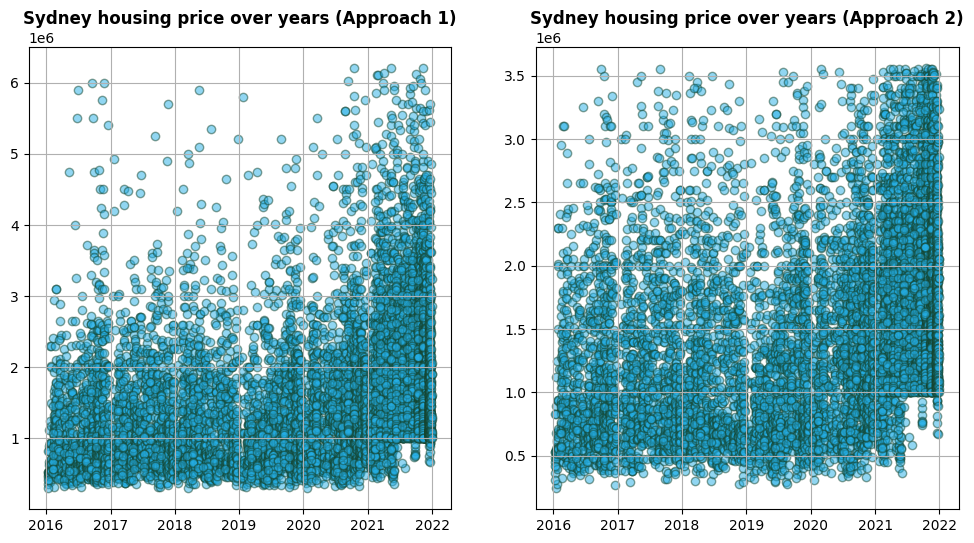

(9468, 23)
Approach 1 remove outlier by calculating percentile to see data range, keep:  98.9149 %
Approach 2 remove outlier by calculating IQR to see data range, keep:  94.8973 %


In [94]:
#Approach 1: Calculate percentile to see data range
qr=[0.0009, 0.001, 0.25, 0.5, 0.75, 0.9, 0.999]
for q in qr:
    print("{0:5,.2f} percentile: {1:15,.0f}".format(q*100, house_category['price'].quantile(q)))
l=0.0009
u=0.99
lq = domain_df['price'].quantile(l)
uq = domain_df['price'].quantile(u)
approach1_house_category=domain_df.loc[(domain_df['price']>=lq)&(domain_df['price']<=uq) ]

#Approach 1: Calculate percentile to see data range
q1 = house_category['price'].quantile(0.25)
q3 = house_category['price'].quantile(0.75)
iqr=q3-q1
l1=q1-1.5*iqr
l2=q3+1.5*iqr
approach2_house_category=domain_df.loc[(domain_df['price']>=l1)&(domain_df['price']<=l2)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# First scatter plot
ax1.scatter(approach1_house_category['date_sold'], approach1_house_category['price'], marker='o', c='#24AFE7', edgecolor='#14452F', alpha=0.5)
ax1.set_title("Sydney housing price over years (Approach 1)",fontweight='bold')
ax1.grid()
# Second scatter plot
ax2.scatter(approach2_house_category['date_sold'], approach2_house_category['price'], marker='o', c='#24AFE7', edgecolor='#14452F', alpha=0.5)
ax2.set_title("Sydney housing price over years (Approach 2)",fontweight='bold')
ax2.grid()
# Display the plots
plt.show()
print(house_category.shape)
print("Approach 1 remove outlier by calculating percentile to see data range, keep: ",round((approach1_house_category.shape[0]/domain_df.shape[0]*100),4),"%")
print("Approach 2 remove outlier by calculating IQR to see data range, keep: ",round((approach2_house_category.shape[0]/domain_df.shape[0]*100),4),"%")

Since the second approach (IQR method) removes a substantial portion of the data, particularly houses sold in the 4M to 6M range, this could distort the overall trend in the dataset. Therefore, I decided to use the first approach, which is based on percentiles, to remove outliers. This method allows us to retain more data and better capture the general market trends.

In [95]:
domain_df=approach1_house_category

2. Data Analysis and Visualization
In this point, we try to solve the questions below:


In [96]:
#Minimize house type by grouping properties into 4 groups
domain_df.loc[(domain_df['type'] == 'House'), 'segment'] = 'House'
domain_df.loc[(domain_df['type'] == 'Apartment / Unit / Flat'), 'segment'] = 'Apartment'
domain_df.loc[(domain_df['type'] == 'Vacant land'), 'segment'] = 'Vacant land'
domain_df.loc[(domain_df['type'] != 'Vacant land') &
              (domain_df['type'] != 'Apartment / Unit / Flat') &
              (domain_df['type'] != 'House'), 'segment'] = 'Others'

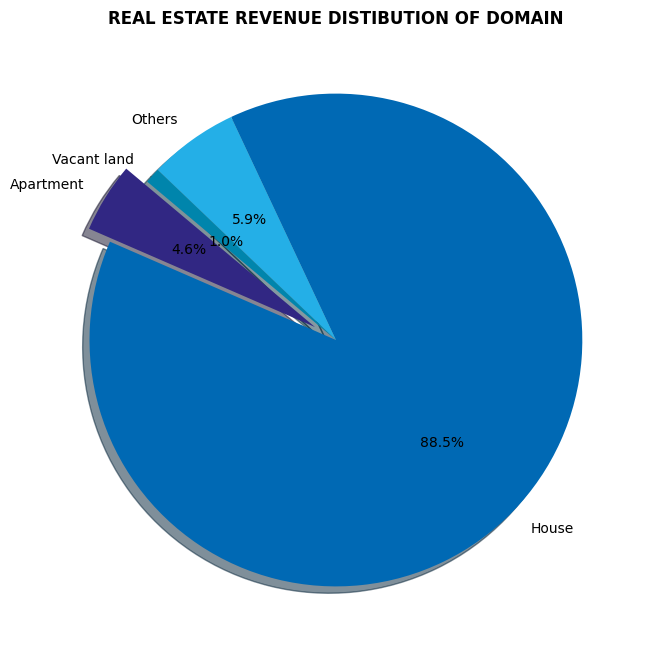

In [97]:
grouped_data = domain_df.groupby('segment')['price'].sum().reset_index()
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0, 0)
labels = grouped_data['segment']
sizes = grouped_data['price']

colors = ['#312783', '#0069B4','#24AFE7','#0085AC']
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('REAL ESTATE REVENUE DISTIBUTION OF DOMAIN', fontweight='bold')
plt.show()

Generally, houses have dominated the real estate market since 2016 in the Domain dataset, making up 88.7% of the company’s revenue. Apartments account for 4.5% of total sales, vacant land for 1%, and other types of housing, such as semi-attached houses and studios, for 5.8%.

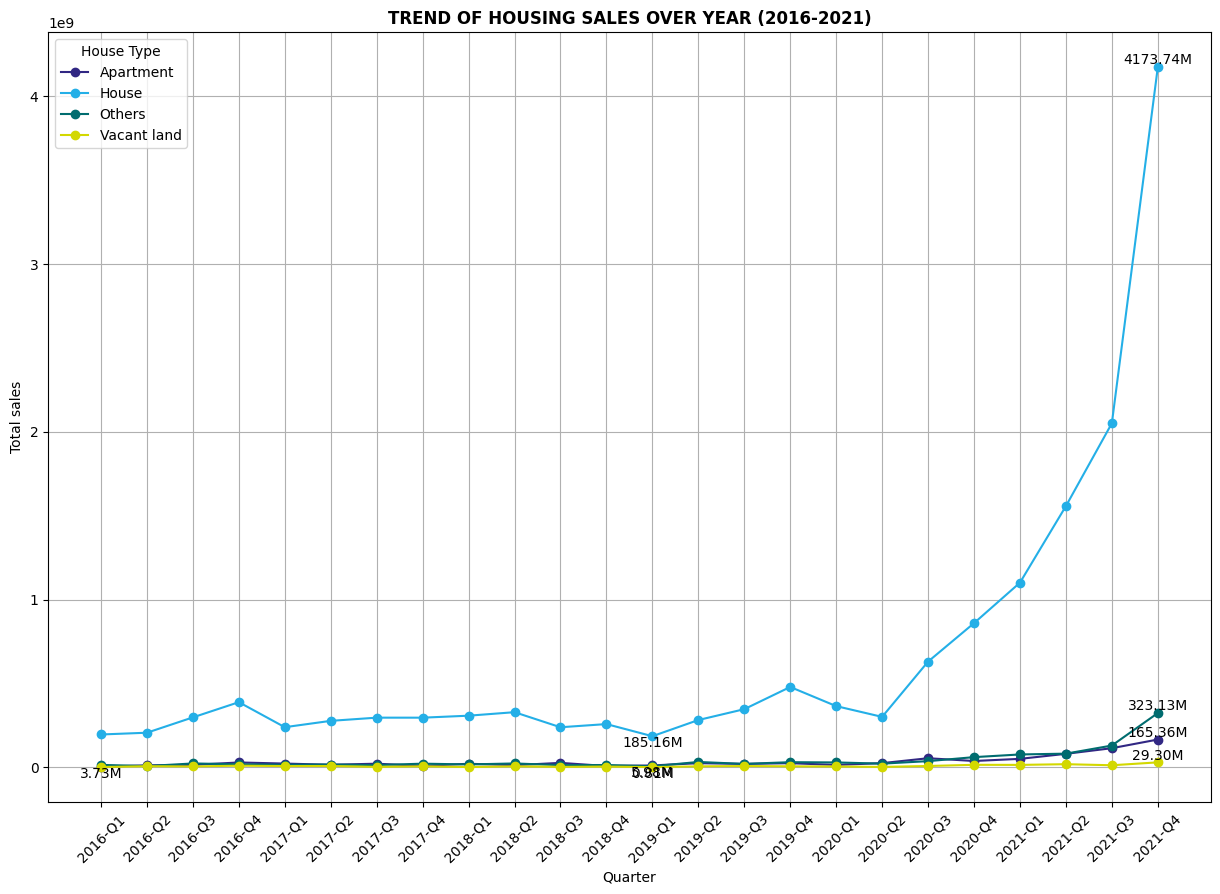

In [98]:
grouped_data = domain_df[domain_df['quarter_sold']!='2022-Q1'].groupby(['quarter_sold', 'segment'])['price'].sum().reset_index()

# Set the figure size
plt.figure(figsize=(15, 10))
colors_palette=['#312783', '#24AFE7','#006C6F','#D3D800','#FFED00']
# Plot each type separately
for i, house_type in enumerate(grouped_data['segment'].unique()):
    type_data = grouped_data[grouped_data['segment'] == house_type]
    plt.plot(type_data['quarter_sold'], type_data['price'], marker='o', linestyle='-', label=house_type, color=colors_palette[i % len(colors_palette)])
plt.xlabel('Quarter')
plt.xticks(rotation=45)
plt.ylabel('Total sales')
plt.title('TREND OF HOUSING SALES OVER YEAR (2016-2021)', fontweight='bold')
plt.grid(True)
plt.legend(title='House Type')

# Adding text labels for each point in millions, positioned based on trend
for house_type in grouped_data['segment'].unique():
    type_data = grouped_data[grouped_data['segment'] == house_type]
    
    # Find the index of the highest and smallest price
    max_index = type_data['price'].idxmax()
    min_index = type_data['price'].idxmin()
    
    # Display text for the highest price
    plt.text(type_data['quarter_sold'].loc[max_index], type_data['price'].loc[max_index],
             f'{type_data["price"].loc[max_index]/1000000:.2f}M',
             ha='center', va='bottom')
    
    # Display text for the smallest price
    plt.text(type_data['quarter_sold'].loc[min_index], type_data['price'].loc[min_index],
             f'{type_data["price"].loc[min_index]/1000000:.2f}M',
             ha='center', va='top')

plt.show()

The real estate industry experienced a quiet period starting in 2016, with three house types reaching their lowest points in five years. Then, it began to recover in Q2 2020 after a dramatic drop in Q1 2019 due to the pandemic’s impact. By the last quarter of 2021, every house type had hit its peak, particularly, 4.4 Billion for house, 173 Million dollars for Apartment and almost 30 Million dollars for vacant land.

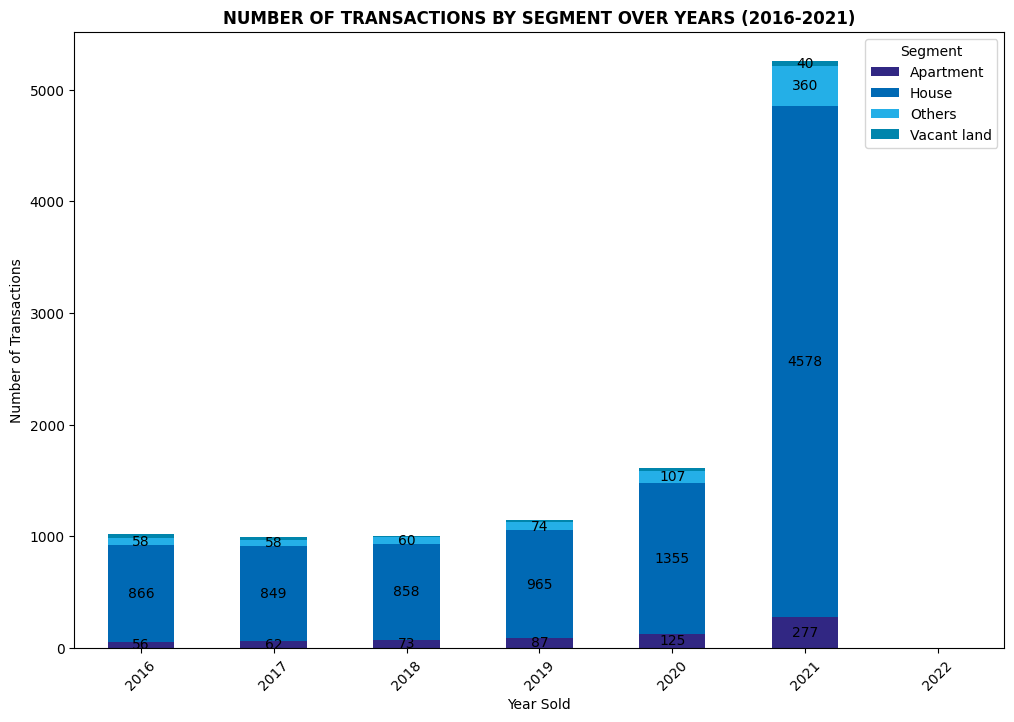

In [99]:
transactions=domain_df.groupby(['year_sold','segment'])['price'].count().reset_index()
transactions_pivot = transactions.pivot(index='year_sold', columns='segment', values='price').fillna(0)
colors_palette=['#312783', '#0069B4','#24AFE7','#0085AC','#006C6F','#006A32','#799E1A','#94C11F','#D3D800','#FFED00']
# Plot the stacked bar chart
ax = transactions_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors_palette)

# Add text on top of each bar
for container in ax.containers:
    labels = [int(v) if v >= 40 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

plt.xlabel('Year Sold')
plt.ylabel('Number of Transactions')
plt.title('NUMBER OF TRANSACTIONS BY SEGMENT OVER YEARS (2016-2021)', fontweight='bold')
plt.legend(title='Segment')
plt.xticks(rotation=45)
plt.show()

By looking at the chart, we can see that real estate transactions have dramatically increased recently, especially since 2021. Every house type has seen a significant rise, hitting a peak in the last quarter of 2021. This can be explained by the impact of the pandemic in 2019 and 2020. After that quiet period, the real estate market recovered strongly compared to 2019 and earlier.

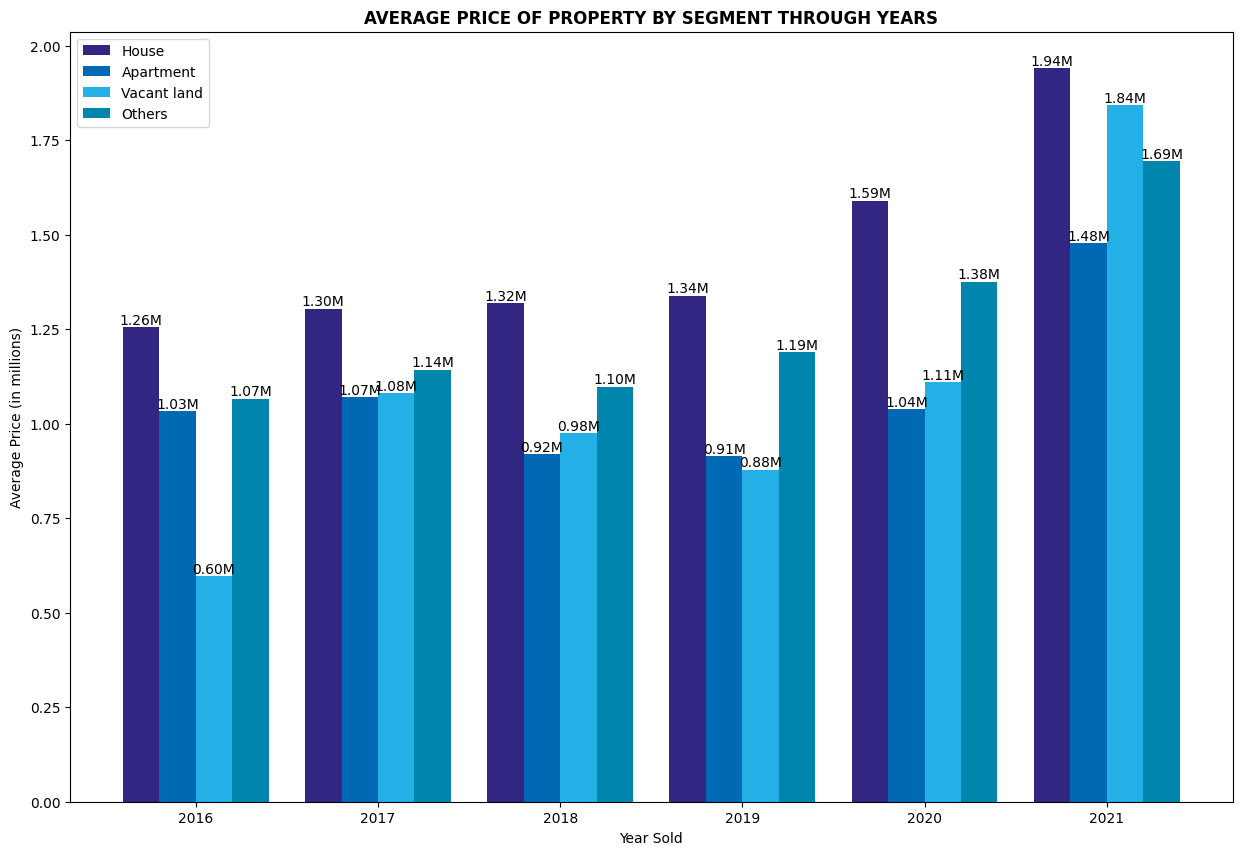

In [100]:
grouped_data = domain_df[domain_df['year_sold']!=2022].groupby(['year_sold', 'segment'])['price'].mean().reset_index()

x = np.arange(len(grouped_data['year_sold'].unique()))  # Adjust the range based on unique years
width = 0.2

# Define the segments and their corresponding colors
segments = ['House', 'Apartment', 'Vacant land', 'Others']
colors = ['#312783', '#0069B4','#24AFE7','#0085AC'] 

plt.figure(figsize=(15, 10))

# Loop through each segment and plot the data
for i, segment in enumerate(segments):
    prices = grouped_data[grouped_data['segment'] == segment]['price'].to_numpy() / 1_000_000  # Convert to millions
    bars = plt.bar(x + (i - 1.5) * width, prices, width, color=colors[i], label=segment)
    
    # Add text annotations
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}M', ha='center', va='bottom')

# Adjust xticks to reflect the years
plt.xticks(x, grouped_data['year_sold'].unique())
plt.title('AVERAGE PRICE OF PROPERTY BY SEGMENT THROUGH YEARS', fontweight='bold')
plt.xlabel("Year Sold")
plt.ylabel("Average Price (in millions)")
plt.legend()
plt.show()

We can clearly see that the average prices of houses and apartments remained stable and slightly decreased from 2016 to 2018. Especially for apartments, the price dramatically went down to 0.89M in 2019, while house prices reached 1.4M that year. After 2019, both prices increased, reaching 2.04M for houses and 1.5M for apartments in 2021.

Additionally, vacant land is the most volatile segment in the real estate industry. After declining from 2017 to 2019, its price rose until 2021. This can be explained in two ways: either the real price of vacant land is increasing, or the recent transactions of vacant land are too few but involve larger amounts of money. However, in this dataset, we don’t have enough data about vacant land to draw a definitive conclusion.

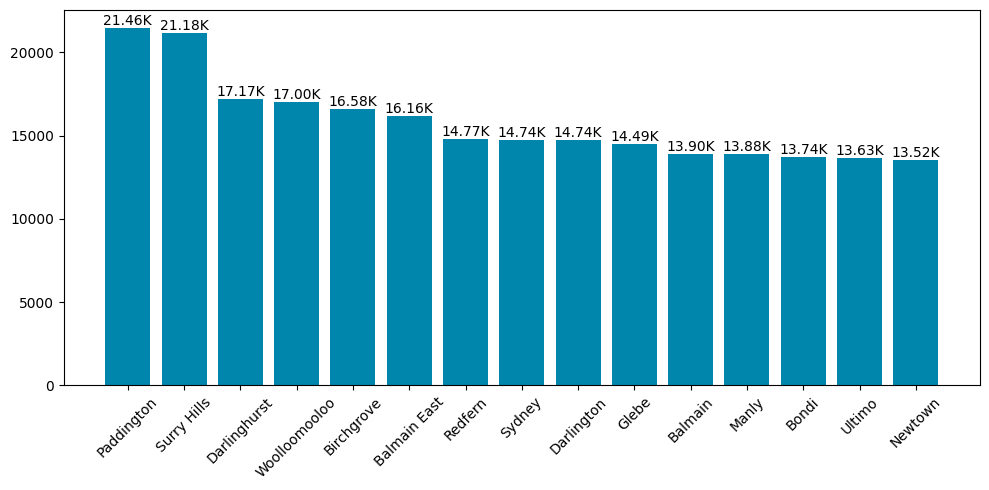

In [101]:

filtered_suburbs =domain_df.groupby('suburb').filter(lambda x: x['price'].count() >= 10)
# Now, calculate the mean prices for these suburbs
mean_prices = filtered_suburbs.groupby('suburb')['price_per_square'].mean().reset_index().sort_values(by='price_per_square',ascending=False)
mean_prices=mean_prices.head(15)
# filtered_suburbs
plt.figure(figsize=(10,5))
plt.bar(mean_prices['suburb'], mean_prices['price_per_square'], color='#0085AC')

# Adding formatted text labels for each bar
for i, value in enumerate(mean_prices['price_per_square']):
    plt.text(i, value, f'{value/1e3:.2f}K', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts layout to avoid overlap
plt.show()


The above chart reveals top 15 suburb have the highest average housing price per square

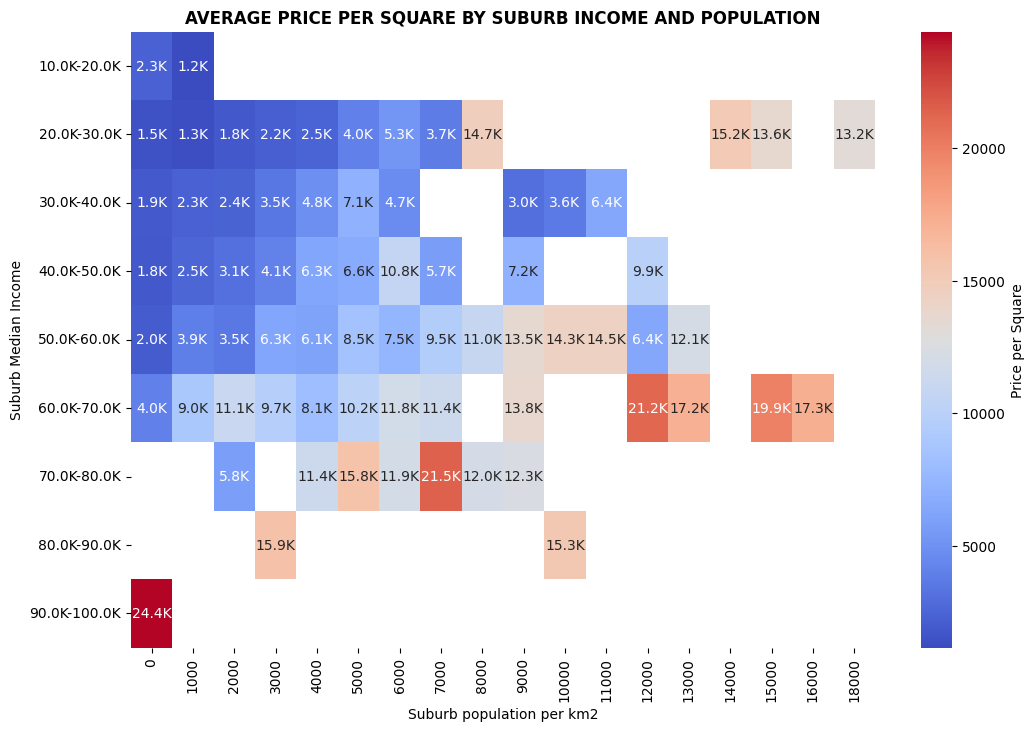

In [102]:
#Create function to group data row by range
def categorize_argument(value, min_value, max_value, step):
    for i in range(min_value, max_value, step):
        if (value - i) < step:
            return f'{i/1000}K-{(i+step)/1000}K'
    return f'{max_value/1000}K+'

def categorize_distance(value, min_value, max_value, step):
    for i in range(min_value, max_value, step):
        if (value - i) < step:
            return i
    return max_value

# Apply the function to create new columns
domain_df['suburb_med_income'] = domain_df['suburb_median_income'].apply(categorize_argument, args=(10000, 100000, 10000))
domain_df['sub_population_per_km2'] = domain_df['suburb_population_per_km2'].apply(categorize_distance, args=(0, 20000, 1000))

# Group by the new categories and calculate the mean price per square
grouped_data = domain_df.groupby(['suburb_med_income', 'sub_population_per_km2'])['price_per_square'].mean().unstack()

#display number in heat map with K
def custom_annot(val):
    return f'{val/1000:.1f}K'

# Create the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, fmt='', cmap='coolwarm', annot_kws={"size": 10}, cbar_kws={'label': 'Price per Square'})
for text in plt.gca().texts:
    text.set_text(custom_annot(float(text.get_text())))
plt.title('AVERAGE PRICE PER SQUARE BY SUBURB INCOME AND POPULATION', fontweight='bold')
plt.xlabel('Suburb population per km2')
plt.ylabel('Suburb Median Income')
plt.show()

Looking at the heat chart, we can say that the suburb income significantly impact on house pricing. The higher income area, the higher housing price with almost highest pricing house is loacted in suburb with over 50K per year income. Additionally, the price is also affect on the price with medium or large size of suburb population (>5000 people) the price is higher compare to lower that limit. Except over 80k income suburb, the population seem not impact on house price

C:\Users\UOW\AppData\Local\Temp\ipykernel_11084\1615721753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_data['int_distance_from_CBD']=modified_data['km_from_cbd'].apply(categorize_distance,args=(-1,100,1))


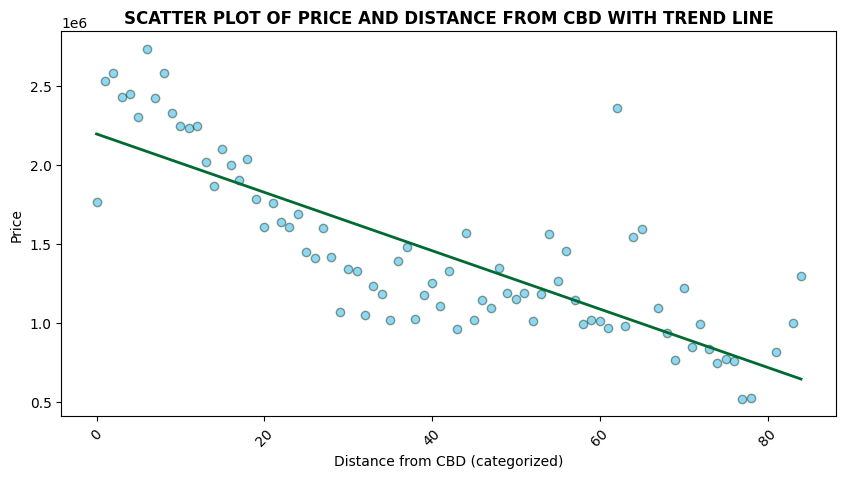

In [103]:
modified_data=domain_df[(domain_df['price']<6000000) & (domain_df['segment']=='House')]
modified_data['int_distance_from_CBD']=modified_data['km_from_cbd'].apply(categorize_distance,args=(-1,100,1))
modified_data = modified_data.sort_values(by='int_distance_from_CBD')
modified_data =modified_data.groupby('int_distance_from_CBD')['price'].mean().reset_index()

plt.figure(figsize=(10,5))
x = modified_data['int_distance_from_CBD'].astype(float)
y = modified_data['price']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(x)

# Plot the trend line
plt.plot(x, trendline, color='#006A32', linewidth=2)

plt.xticks(rotation=45)
plt.xlabel('Distance from CBD (categorized)')
plt.ylabel('Price')
plt.title('SCATTER PLOT OF PRICE AND DISTANCE FROM CBD WITH TREND LINE', fontweight='bold')

plt.scatter(modified_data['int_distance_from_CBD'],modified_data['price'],marker='o',c='#24AFE7',edgecolors='#14452F',alpha=0.5)
plt.xticks(rotation=45)
plt.show()

The scatter plot illustrates the relationship between property prices and their distance from the Central Business District (CBD). The trend line indicates a negative correlation, suggesting that properties closer to the CBD tend to have higher prices. This trend is consistent with urban economic theories, where proximity to central areas often commands a premium due to better access to amenities and services.

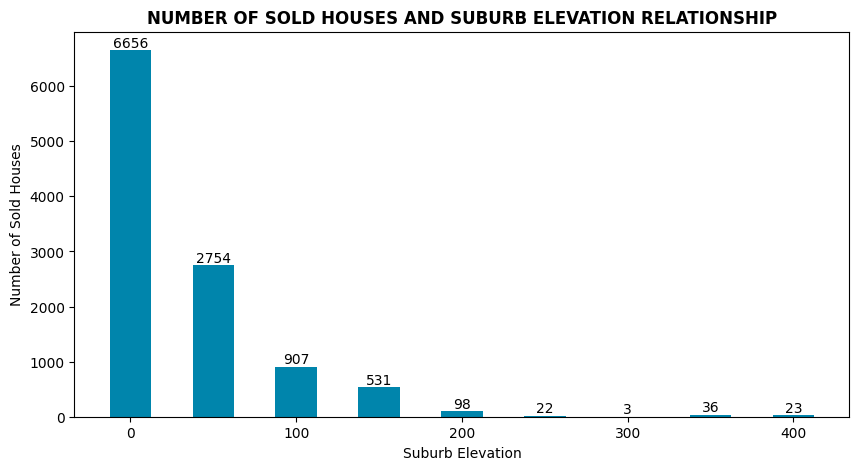

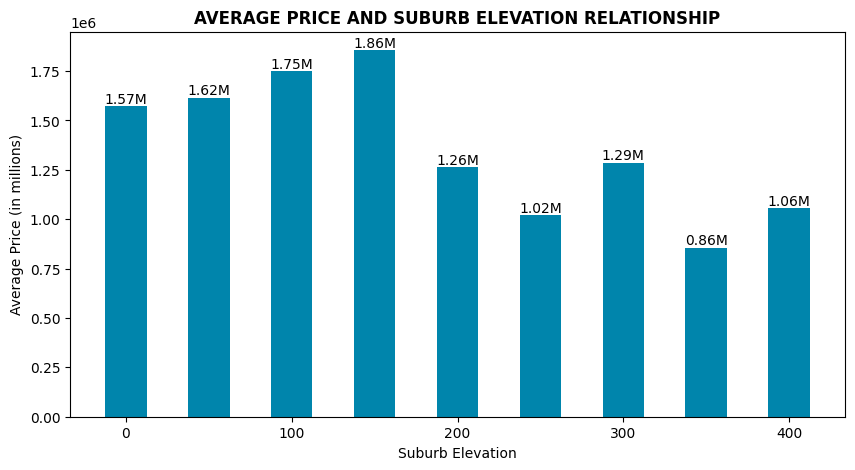

In [104]:
def plot_bar_chart(data, x_col, y_col, xlabel, ylabel, title, width=25, y_format=None):
    plt.figure(figsize=(10,5))
    plt.bar(data[x_col], data[y_col], width=width,color='#0085AC')
    for i, value in enumerate(data[y_col]):
        if y_format:
            plt.text(data[x_col][i], value, y_format(value), ha='center', va='bottom')
        else:
            plt.text(data[x_col][i], value, str(value), ha='center', va='bottom')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title,fontweight='bold')
    plt.show()

# Categorize elevation
domain_df['sub_elevation'] = domain_df['suburb_elevation'].apply(categorize_distance, args=(0, 500, 50))

# Plot number of sold houses
grouped_data_count = domain_df.groupby('sub_elevation')['price'].count().reset_index()
plot_bar_chart(grouped_data_count, 'sub_elevation', 'price', 'Suburb Elevation', 'Number of Sold Houses', 'NUMBER OF SOLD HOUSES AND SUBURB ELEVATION RELATIONSHIP')

# Plot average price
grouped_data_mean = domain_df.groupby('sub_elevation')['price'].mean().reset_index()
plot_bar_chart(grouped_data_mean, 'sub_elevation', 'price', 'Suburb Elevation', 'Average Price (in millions)', 'AVERAGE PRICE AND SUBURB ELEVATION RELATIONSHIP', y_format=lambda x: f'{x/1e6:.2f}M')

The average price of houses at elevations of 150 meters and lower seems higher than those at elevations over 200 meters. Additionally, the number of houses sold decreases as elevation increases.

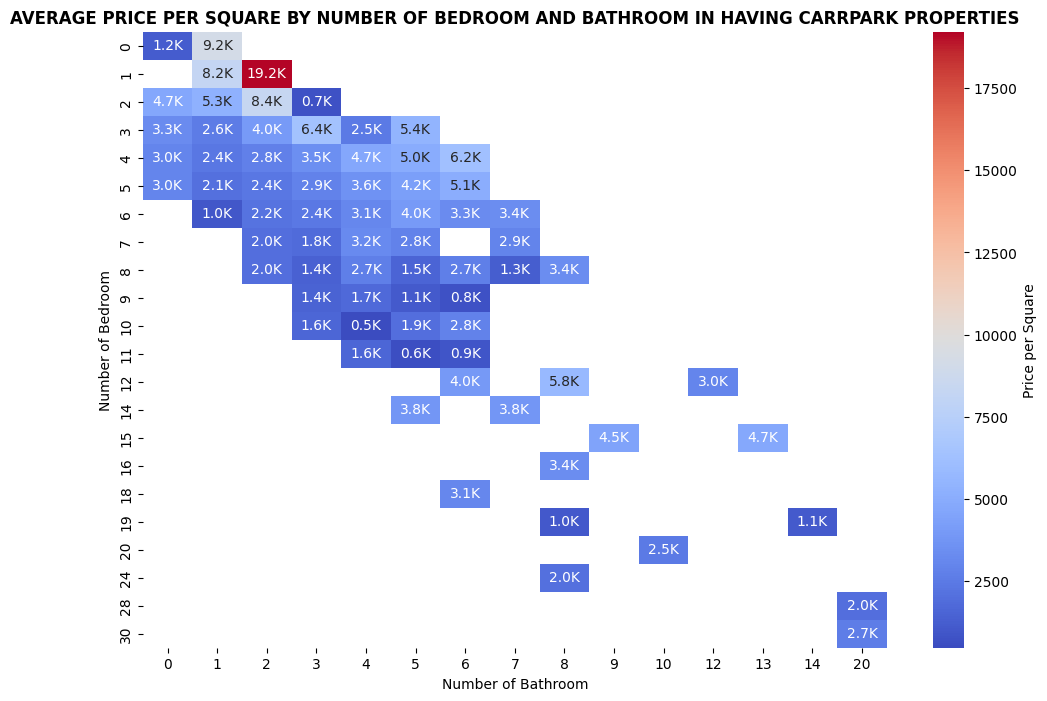

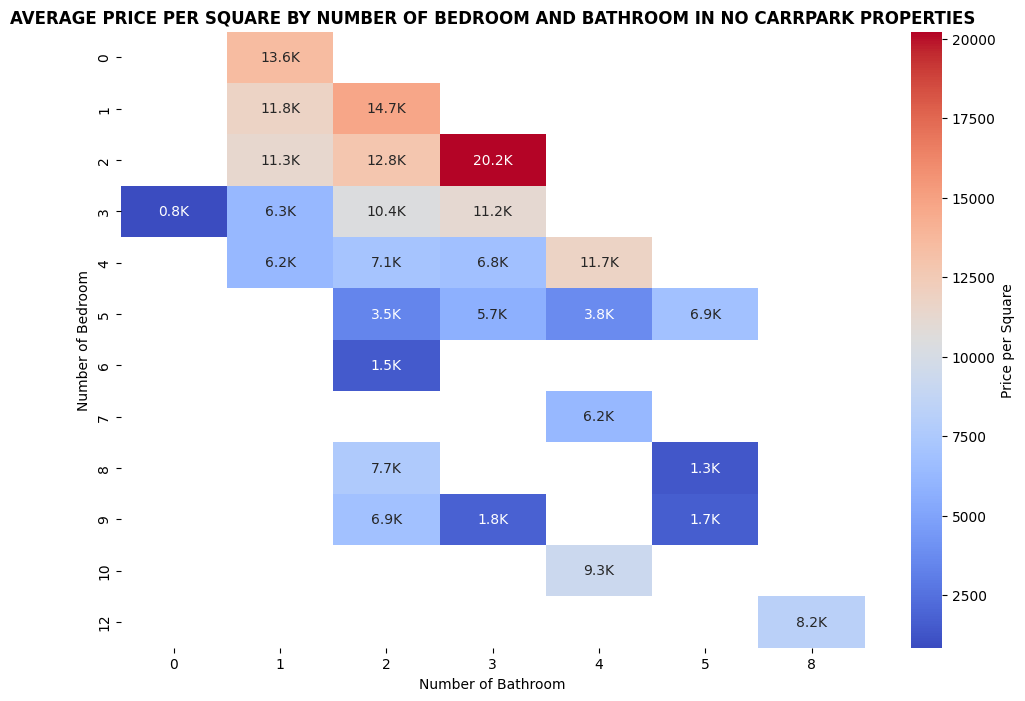

In [105]:
domain_df.loc[(domain_df['num_parking'] <1), 'Have carpark'] = 'No'
domain_df.loc[(domain_df['num_parking'] >=1), 'Have carpark'] = 'Yes'

grouped_data1 = domain_df[(domain_df['segment']!='Vacant land') & (domain_df['Have carpark']=='Yes')].groupby(['num_bed', 'num_bath'])['price_per_square'].mean().unstack()
grouped_data2 = domain_df[(domain_df['segment']!='Vacant land') & (domain_df['Have carpark']=='No')].groupby(['num_bed', 'num_bath'])['price_per_square'].mean().unstack()

# Create the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data1, annot=True, fmt='', cmap='coolwarm', annot_kws={"size": 10}, cbar_kws={'label': 'Price per Square'})
for text in plt.gca().texts:
    text.set_text(custom_annot(float(text.get_text())))
plt.title('AVERAGE PRICE PER SQUARE BY NUMBER OF BEDROOM AND BATHROOM IN HAVING CARRPARK PROPERTIES', fontweight='bold')
plt.xlabel('Number of Bathroom')
plt.ylabel('Number of Bedroom')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data2, annot=True, fmt='', cmap='coolwarm', annot_kws={"size": 10}, cbar_kws={'label': 'Price per Square'})
for text in plt.gca().texts:
    text.set_text(custom_annot(float(text.get_text())))
plt.title('AVERAGE PRICE PER SQUARE BY NUMBER OF BEDROOM AND BATHROOM IN NO CARRPARK PROPERTIES', fontweight='bold')
plt.xlabel('Number of Bathroom')
plt.ylabel('Number of Bedroom')
plt.show()

The price of properties without a carpark depends on the number of bedrooms and bathrooms. The most expensive combinations are 1 to 3 bathrooms and 0 to 2 bedrooms. However, there are exceptions, such as a 12-bedroom, 6-bathroom house priced at $16.2K per m² and a 4-bedroom, 4-bathroom house priced at $11.2K per m²
For properties with a carpark, the prices are notable, with a 1-bedroom, 2-bathroom property having a mean value of $19.2K per m².


In [106]:
import folium
mean_prices = domain_df.groupby(['suburb', 'suburb_lat', 'suburb_lng'])['price'].mean().reset_index()

# Create a map centered around the average location
map_center = [mean_prices['suburb_lat'].mean(), mean_prices['suburb_lng'].mean()]
m = folium.Map(location=map_center, zoom_start=12)

# Add markers for each suburb with mean housing price
for _, row in mean_prices.iterrows():
    folium.Marker(
        location=[row['suburb_lat'], row['suburb_lng']],
        popup=f"{row['suburb']}: ${row['price']:,.2f}",
        icon=folium.Icon(color='blue')
    ).add_to(m)

title_html = '''
             <div style="position: fixed; 
                         top: 10px; left: 400px; width: 100%; height: 50px; 
                         z-index:9999; font-size:24px;">
                         <b>Mean Housing Prices by Suburb</b></div>
             '''
m.get_root().html.add_child(folium.Element(title_html))

# Save the map to an HTML file
m.save('mean_housing_price_map.html')

# Display the map in a Jupyter Notebook (if you're using one)
m

IV. Data Prediction
1. Data Preparation for predictor

In [107]:
#ALL_Types_of_Regression
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, explained_variance_score,mean_absolute_error,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from time import time
import scipy as sp

In [108]:
prediction_df= dataset1.copy()

#Label all category data
encoder = LabelEncoder()
prediction_df['house_type'] = encoder.fit_transform(prediction_df['type'])
target_mean =prediction_df.groupby('suburb')['price'].mean()

#Add column mean housing price of suburb to analyse
prediction_df['suburb_encoded'] = prediction_df['suburb'].map(target_mean)
prediction_df['date_sold']=pd.to_datetime(prediction_df['date_sold'])
prediction_df['year_sold']=prediction_df['date_sold'].dt.year

#Convert year into int to apply in linear regression
prediction_df['year_sold']=prediction_df['year_sold'].astype(int)

#Drop price columnn
prediction_df=prediction_df.drop(['date_sold','suburb','suburb_lat','suburb_lng','type'],axis=1)
X=prediction_df.drop(['price'],axis=1)
y=prediction_df['price']
prediction_df.head(5)

C:\Users\UOW\AppData\Local\Temp\ipykernel_11084\2111776488.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  prediction_df['date_sold']=pd.to_datetime(prediction_df['date_sold'])


,price,num_bath,num_bed,num_parking,property_size,suburb_population,suburb_median_income,suburb_sqkm,suburb_lat,suburb_lng,suburb_elevation,cash_rate,property_inflation_index,km_from_cbd,house_type,suburb_encoded,year_sold
0,530000,4,4,2,1351,7093,29432,9.914,-33.47252,151.40208,24,2.0,150.9,47.05,5,8.842139e+05,2016
1,525000,2,4,2,594,2538,24752,1.397,-33.21772,151.55237,23,2.0,150.9,78.54,5,5.250000e+05,2016
2,480000,2,4,2,468,2028,31668,1.116,-33.32678,151.44557,3,2.0,150.9,63.59,5,8.076952e+05,2016
3,452000,1,3,1,344,9835,32292,4.055,-34.05375,150.83957,81,2.0,150.9,40.12,5,6.237045e+05,2016
4,365500,0,0,0,1850,2200,45084,1.497,-33.45608,151.43598,18,2.0,150.9,49.98,14,2.047321e+06,2016


In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)
scaler=StandardScaler()
Scaled_X_train=scaler.fit_transform(X_train)
Scaled_X_test=scaler.transform(X_test)

Split the dataset into training and testing set. Using scaler to standardize the data feature by using data point minus mean / standard deviation

In [110]:
def run_model(model, X_train, X_test, y_train, y_test):
    # Standardize the data
    Scaled_X_train = scaler.fit_transform(X_train).round()
    Scaled_X_test = scaler.transform(X_test).round()
    
    # Fit the model
    model.fit(Scaled_X_train, y_train)
    
    # Make predictions
    preds = model.predict(Scaled_X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    r2 = r2_score(y_test, preds)
    score_model = model.score(Scaled_X_test, y_test)
    
    # Print metrics
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared: {r2}")
    print(f"Score: {score_model}")
    
    return preds

# Hyperparameter tuning for Ridge regression
ridge_model = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_ridge_model = grid_search.best_estimator_

# Run the optimized model
preds = run_model(best_ridge_model, X_train, X_test, y_train, y_test)


Mean Squared Error: 622657514091.8136
Mean Absolute Error: 468058.6573028677
R-squared: 0.5320513640246614
Score: 0.5320513640246614


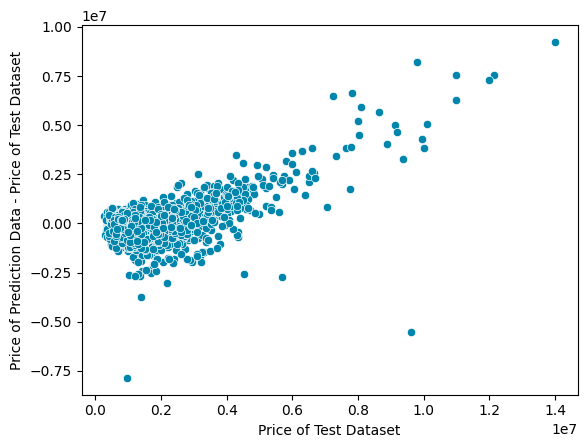

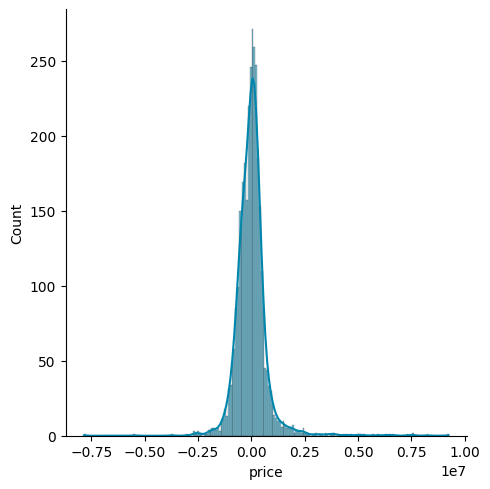

In [111]:
#What is the residual and actual price relationship after predicting
residuals=y_test-preds
residuals
sns.scatterplot(x=y_test,y=residuals,color='#0085AC')
plt.xlabel('Price of Test Dataset')
plt.ylabel('Price of Prediction Data - Price of Test Dataset')
sns.displot(residuals,kde=True,color='#0085AC')

We can see that the residual value is around 0 and almost distribute in range of -0.25 to 0.25. It seem not good for a predictive model

LinearRegression()

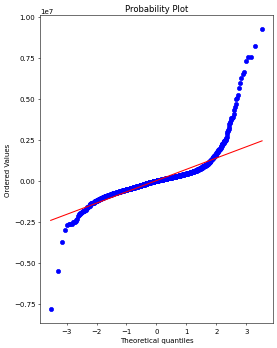

In [112]:
import scipy as sp
g,ax=plt.subplots(figsize=(6,8),dpi=50)
_=sp.stats.probplot(residuals,plot=ax)
final_model=LinearRegression()
final_model.fit(X_train,y_train)

So the linear regression is not suitable in this situation we should try other model


Text(0, 0.5, 'Housing Price')

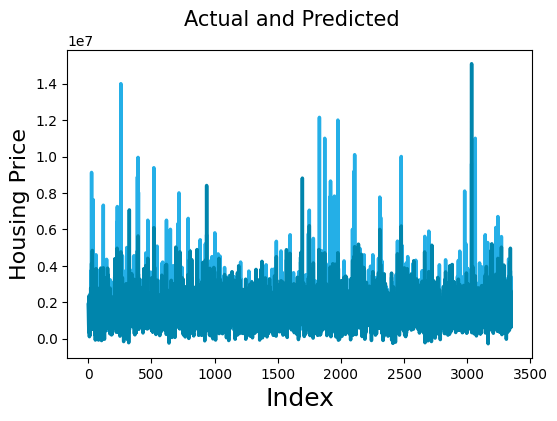

In [113]:
c = [i for i in range(1,3349,1)] # generating index 
fig = plt.figure(figsize=(6,4))
plt.plot(c,y_test, color="#24AFE7", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,preds, color="#0085AC",  linewidth=2.5, linestyle="-") #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=15)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Housing Price', fontsize=16)   

In [114]:

rand_regr = RandomForestRegressor(n_estimators=400,random_state=0)
start = time()
rand_regr.fit(X_train, y_train)
end=time()
train_time_rand=end-start
random=rand_regr.score(X_test,y_test)
predictions = rand_regr.predict(X_test)
exp_rand = explained_variance_score(predictions,y_test)

In [115]:
start = time()
est=GradientBoostingRegressor(n_estimators=400, max_depth=5,min_samples_split=2,learning_rate=0.01).fit(X_train, y_train)
end=time()
train_time_g=end-start
gradient=est.score(X_test,y_test)
pred = est.predict(X_test)
exp_est = explained_variance_score(pred,y_test)

In [116]:
start = time()
ada=AdaBoostRegressor(n_estimators=50, learning_rate=0.2,loss='exponential').fit(X_train, y_train)
end=time()
train_time_ada=end-start
pred=ada.predict(X_test)
adab=ada.score(X_test,y_test)
predict = ada.predict(X_test)
exp_ada = explained_variance_score(predict,y_test)

In [117]:
# Comparing Models on the basis of Model's Accuracy Score and Explained Variance Score of different models
models_cross = pd.DataFrame({
    'Model': ['Gradient Boosting','AdaBoost','Random Forest'],
    'Score': [gradient,adab,random],
     'Variance Score': [exp_est,exp_ada,exp_rand]})
    
models_cross.sort_values(by='Score', ascending=False)

,Model,Score,Variance Score
2,Random Forest,0.642681,0.588819
1,AdaBoost,0.455764,-0.052710
0,Gradient Boosting,0.304204,0.422419


V. CONCLUSION

The analysis of housing prices reveals several key insights. Firstly, there is a clear correlation between suburb income and housing prices, with higher-income areas generally commanding higher prices. This trend is particularly evident in suburbs where the median income exceeds $50K per year. Additionally, the population size of a suburb also influences housing prices, with medium to large populations (over 5,000 people) associated with higher prices, except in the highest income brackets where population size seems less impactful.

The real estate market experienced a quiet period from 2016, with a notable drop in Q1 2019 due to the pandemic. However, since Q2 2020, the market has shown a strong recovery, peaking in the last quarter of 2021 across all house types.

Furthermore, properties without carparks show a dependency on the number of bedrooms and bathrooms, with certain combinations being more expensive. Properties with carparks, particularly those with 1 bedroom and 2 bathrooms, have notably high prices.

Lastly, elevation also plays a role in housing prices, with properties at elevations of 150 meters and lower being more expensive on average than those at higher elevations. The number of houses sold also decreases as elevation increases.

Overall, Random Forest is the most suitable model in this case because the five-year cycle of data is not well-aligned with a linear model, especially during a period of significant change in NSW, marked by high inflation and the impacts of the COVID-19 pandemic. The non-linear trends during this time make it difficult for linear regression to capture sudden shifts. Additionally, Random Forest can account for various factors by identifying and weighing the importance of different variables over time, making it more suitable for long-term analysis.